<a href="https://colab.research.google.com/github/udyansachdev1/Cloud_us26_week1/blob/main/us26_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.9 MB/s eta 0:00:00


In [4]:
# Importing the Required Pacakges and Libraries

import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from datasets import load_dataset
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# loading the Dataset
data = load_dataset("cifar10")
data

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

Text(0.5, 1.0, '0')

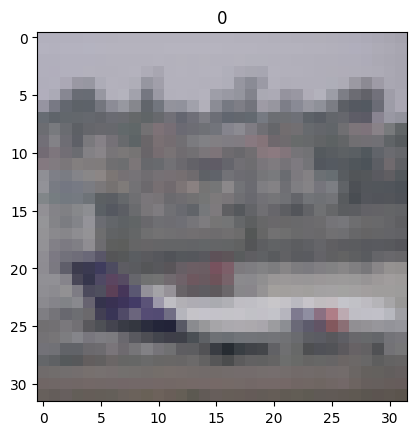

In [6]:
element = next(iter(data['train']))
plt.imshow(element['img'])
plt.title(element['label'])

### Data Preprocessing

Training data

In [7]:
# Preprocess images and flatten
X_train = np.array([np.array(i)[None, ...] / 255.0 for i in data["train"]["img"][:]])
X_train = X_train.reshape(X_train.shape[0], -1)

# Labels
y_train = np.array(data["train"]["label"][:])

Test Data

In [8]:
# Preprocess images and flatten
X_test = np.array([np.array(i)[None, ...] / 255.0 for i in data["test"]["img"][:]])
X_test = X_test.reshape(X_test.shape[0], -1)

# Labels
y_test = np.array(data["test"]["label"][:])

## Model Performance

### Random Forest model without ResNet50


In [9]:
# Initializing the Model
model_rf_raw = RandomForestClassifier(n_estimators=200)

# Fitting the Model
model_rf_raw.fit(X_train, y_train)

# Predicting the Test Data
y_pred = model_rf_raw.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with 200 estimators: {accuracy:.2%}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix with 200 estimators: \n{conf_matrix}")

Accuracy with 200 estimators: 47.80%
Confusion Matrix with 200 estimators: 
[[566  27  59  15  28  19  25  28 172  61]
 [ 27 546  11  39  24  28  43  27  61 194]
 [104  45 355  75 134  66 106  57  29  29]
 [ 51  43  72 280  84 183 135  55  21  76]
 [ 57  22 144  55 407  44 139  88  23  21]
 [ 27  28  89 141  77 404  87  76  33  38]
 [  8  29  73  67 106  53 587  23   9  45]
 [ 49  40  48  64  95  73  53 460  23  95]
 [ 83  83  20  33  15  33  11  22 614  86]
 [ 43 168  14  33  20  15  26  41  79 561]]


### Logistic Regression model without ResNet50

In [10]:
# Initializing the Logistic Regression Model
model_lr_raw = LogisticRegression(max_iter=300, multi_class="auto", solver="lbfgs", random_state=42)

# Fitting the Model
model_lr_raw.fit(X_train, y_train)

# Predicting on Test Data
y_pred = model_lr_raw.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")

Accuracy: 40.33%
Confusion Matrix: 
[[483  41  58  34  23  29  27  53 180  72]
 [ 54 468  40  39  29  43  38  53  81 155]
 [ 90  40 286  95 116  79 147  74  48  25]
 [ 35  53 105 254  72 198 128  52  42  61]
 [ 54  21 138  73 295  88 168 111  24  28]
 [ 33  46 102 163  89 348  76  68  44  31]
 [ 23  36  70 137  88  92 469  43  14  28]
 [ 52  50  73  68  91  78  33 442  38  75]
 [157  74  23  27  14  38  16  20 531 100]
 [ 64 190  23  30  20  28  48  58  82 457]]


## Generating embeddings using ResNet50

In [ ]:
# Load a pretrained model
model = tf.keras.applications.resnet50.ResNet50(
  include_top=False, # take any input shape, not just 224x224
  weights='imagenet', # use the imagenet pretrained model
  pooling='avg' # use global average pooling to get a 2048 vector from our image
)

# Define a function to preprocess images
def preprocessing(img):
    img_preprocessed = preprocess_input(
        tf.image.resize(
            np.array(img), (224, 224)
        )[None]  # ResNet requires images to be in (224, 224) dimension
    )
    return img_preprocessed

# Use ResNet to get the embeddings
X_train_resnet = np.array([model.predict(preprocessing(i)) for i in data["train"]["img"][:]])
X_train_resnet = X_train_resnet.reshape(X_train_resnet.shape[0], -1)

X_test_resnet = np.array([model.predict(preprocessing(i)) for i in data["test"]["img"][:]])
X_test_resnet = X_test_resnet.reshape(X_test_resnet.shape[0], -1)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 215ms/step


In [1]:
# Visualize embedding
plt.plot(X_train_resnet[0].flatten())

NameError: name 'plt' is not defined

### Random Forest model with ResNet50 embeddings




In [ ]:
# Initializing the Model
model_rf_resnet = RandomForestClassifier(n_estimators=200)

# Fitting the Model
model_rf_resnet.fit(X_train_resnet, y_train)

# Predicting the Test Data
y_pred = model_rf_resnet.predict(X_test_resnet)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with 200 estimators: {accuracy:.2%}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix with 200 estimators: \n{conf_matrix}")

### Logistic Regression model with ResNet50 embeddings


In [ ]:
# Initializing the Logistic Regression Model
model_lr_resnet = LogisticRegression(max_iter=300, multi_class="auto", solver="lbfgs", random_state=42)

# Fitting the Model
model_lr_resnet.fit(X_train_resnet, y_train)

# Predicting on Test Data
y_pred = model_lr_resnet.predict(X_test_resnet)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")

In [ ]:
# @title Lab work
# Loop over the remaining CIFAR10 dataset to produce 2048 embeddings of the image
# Use a logistic regression or random foreset to try and classify these features as before
# Try to use batching to speed up the generation of your features, what is batching?
# Steps:
# 1. Your input data is a 32x32x3 image. You have 50,000 images total so your input dimension is
#    50000 x (32 x 32 x 3). Or 50000 rows and 3072 (which is (32 x 32 x 3)) pixels.
#    Previously we use pixels as features of or Logistic Regression and Random Forest
# 2. The ResNet50 model transforms our pixels into "2048" feature embedding so now it is
#    50000 rows and 2048 columns of "features"
# 3. Use these new features to train a simple logistic regression and random forest model as we did in the scikit learn example
#    https://colab.research.google.com/drive/1KUperg8lvb3gYBPzP6sbZd89Ft8rDbYG#scrollTo=_bAd38A0N73w